## Sentiment Analysis based on Ticker  
Limitation of only 100 news headlines per ticker since that is how much is available on the website.  


In [1]:
# Importing necessary libraries
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np 
import matplotlib_inline as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Setting the url for the website
web_url = 'https://finviz.com/quote.ashx?t='

# Creating an empty dictionary to store the news tables for each ticker
news_tables = {}

# Defining the list of tickers for which we want to get the news
tickers = ['MSFT','AMZN','TSLA','GOOG','NVDA','META']

In [2]:
# Looping through the tickers and getting the news tables for each ticker
for tick in tickers:
    # Concatenating the ticker to the website url to get the specific url for the ticker
    url = web_url + tick
    
    # Making the request to the website and getting the response
    req = Request(url=url, headers={"User-Agent": "Chrome"})
    response = urlopen(req)
    
    # Parsing the html content of the response using BeautifulSoup
    html = BeautifulSoup(response, "html.parser")
    
    # Finding the news table on the html page and storing it in the news_tables dictionary
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table

In [3]:
# Creating an empty list to store the news for all tickers
news_list = []

# Looping through the news tables for each ticker and extracting the news
for file_name, news_table in news_tables.items():
    # Looping through each row of the news table
    for i in news_table.findAll('tr'):
        # Getting the text of the news article
        text = i.a.get_text() 
        
        # Splitting the date and time from the row
        date_scrape = i.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Getting the ticker from the file name
        tick = file_name.split('_')[0]
        
        # Appending the news article to the news_list
        news_list.append([tick, date, time, text])

In [4]:
# Assign column names
columns = ['ticker', 'date', 'time', 'headline']

# Create a dataframe 
news_df = pd.DataFrame(news_list, columns=columns)
news_df

,ticker,date,time,headline
0,MSFT,Mar-01-23,07:15PM,Salesforce CEO Marc Benioff: 'We have hit the ...
1,MSFT,Mar-01-23,05:56PM,Long-Robust U.S. Labor Market Shows Signs of C...
2,MSFT,Mar-01-23,05:51PM,Musk looks to build ChatGPT alternative to com...
3,MSFT,Mar-01-23,05:45PM,Microsoft (MSFT) Dips More Than Broader Market...
4,MSFT,Mar-01-23,04:43PM,Are Artificial Intelligence Investors Overlook...
...,...,...,...,...
595,META,Feb-22-23,07:15AM,Meta Platforms sells East Valley land to data ...
596,META,Feb-22-23,07:00AM,Supreme Court to Hear Arguments on Whether Twi...
597,META,Feb-22-23,05:30AM,Why the 2023 rally might be in trouble: Mornin...
598,META,Feb-22-23,05:25AM,2 Stocks Down More Than 50% to Buy Right Now


In [5]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score of each headline
def get_sentiment_score(headline):
    return analyzer.polarity_scores(headline)['compound']

# Apply the get_sentiment_score function to each headline in the news dataframe
news_df['sentiment_score'] = news_df['headline'].apply(get_sentiment_score)

In [6]:
# Dataframe per equity with a headline 
MSFT = news_df.query("ticker == 'MSFT'")
AMZN = news_df.query("ticker == 'AMZN'")
TSLA = news_df.query("ticker == 'TSLA'")
GOOG = news_df.query("ticker == 'GOOG'")
NVDA = news_df.query("ticker == 'NVDA'")
META = news_df.query("ticker == 'META'")

##### Create a function that Group the news headlines by date and calculate the average sentiment score for each date

In [19]:
# Create a function that Group the news headlines by date and calculate the average sentiment score for each date
import matplotlib.pyplot as plt
def plot_sentiment(df):
    sentiment_news_df = df.groupby('date').mean(numeric_only=True).reset_index()
    fig, ax = plt.subplots(figsize=(10, 4))  # set the figure size
    ax.plot(sentiment_news_df['date'], sentiment_news_df['sentiment_score'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Score')
    ax.axhline(y=0, color='gray', linestyle='--')
    ax.set_title(f'Daily Sentiment Score for {df.ticker.unique()[0]}')
    plt.show()  # display the plot

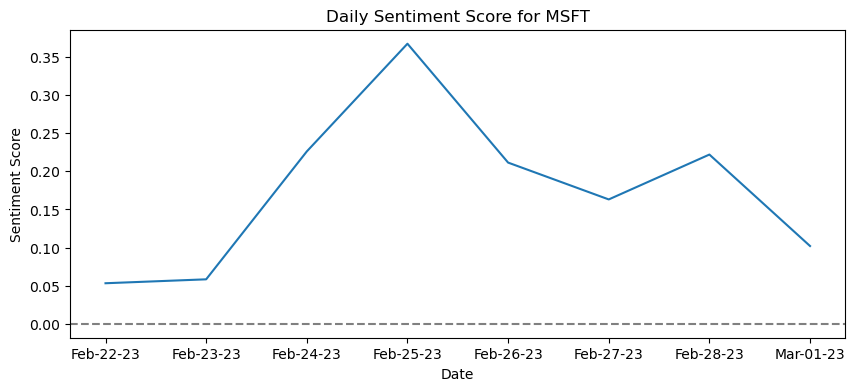

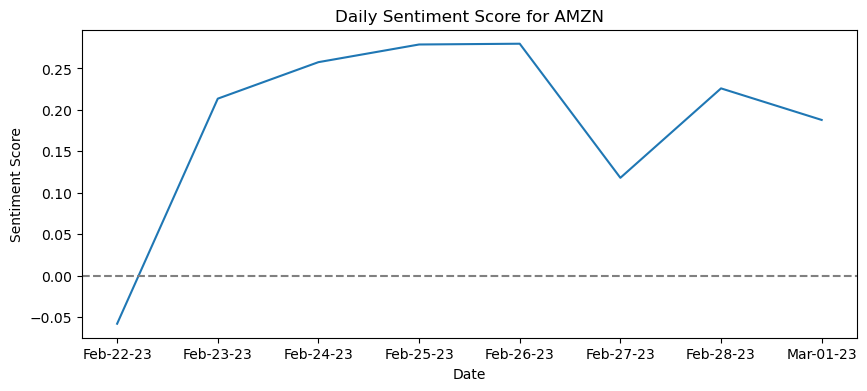

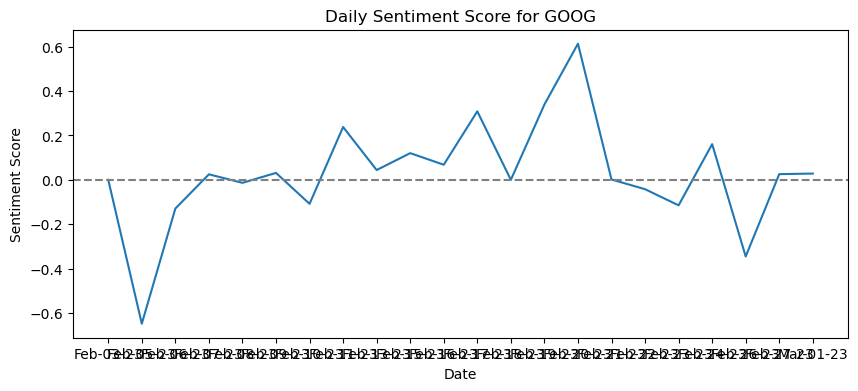

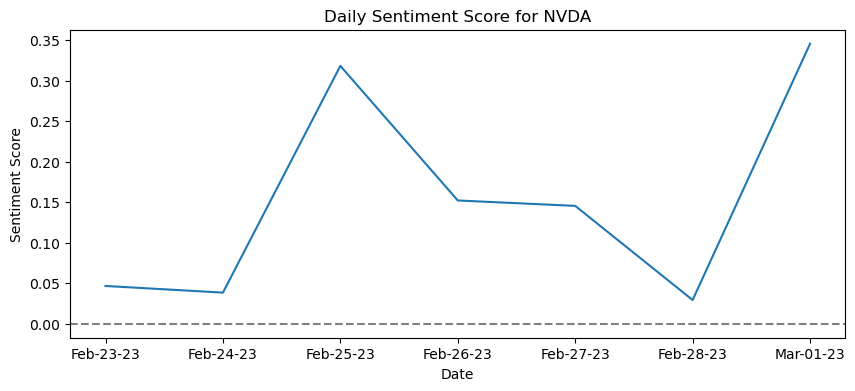

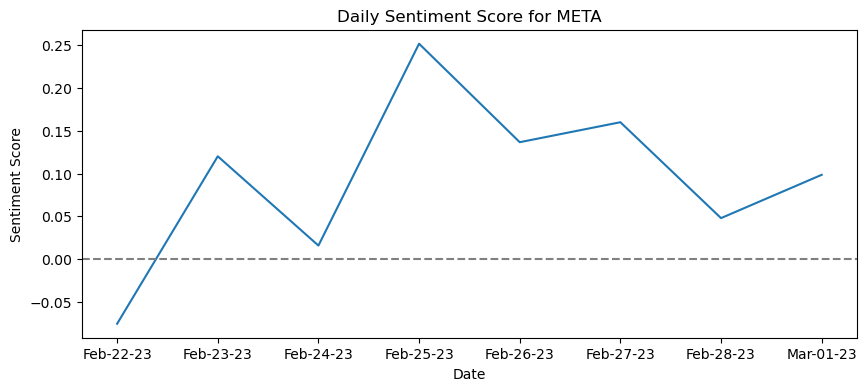

In [21]:
# Ploting the sentimetnt values per stock 
plot_sentiment(MSFT)
plot_sentiment(AMZN)
#plot_sentiment(TSLA)
plot_sentiment(GOOG)
plot_sentiment(NVDA)
plot_sentiment(META) 

### Conclusion
The above charts show the sentiment of a news headline that has been scraped from finviz. The sentiment is derived from a pre-trained model that uses a lexicon-based approach to analyze the sentiment of a piece of text. It assigns a positive, negative, and neutral score to each word in the text, and then calculates a sentiment score based on the sum of those scores. The interpretation of the above chart is whenever the blue line is above the dotted black line (neutral) there is positive sentiment about the stock and negative sentiment when the blue line is below the black dotted line. 
